<a href="https://colab.research.google.com/github/kinasant/ml/blob/main/ml_lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-lab2/Lab Session Data.xlsx


A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data 
and segregate them into 2 matrices A & C (following the nomenclature of AX = C). Do the following 
activities.

• What is the dimensionality of the vector space for this data?

• How many vectors exist in this vector space?

• What is the rank of Matrix A?

• Using Pseudo-Inverse find the cost of each product available for sale. 
(Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a 
pseudo-inverse.)

In [6]:
xls = pd.ExcelFile("/kaggle/input/ml-lab2/Lab Session Data.xlsx")
df1 = pd.read_excel(xls,sheet_name=0)
df1=df1.iloc[:,[i for i in range(0,5)]]

In [ ]:
df2 = pd.read_excel(xls,sheet_name=1)

In [6]:
df1

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs)
0,C_1,20,6,2,386
1,C_2,16,3,6,289
2,C_3,27,6,2,393
3,C_4,19,1,2,110
4,C_5,24,4,2,280
5,C_6,22,1,5,167
6,C_7,15,4,2,271
7,C_8,18,4,2,274
8,C_9,21,1,4,148
9,C_10,16,2,4,198


In [184]:
A = df1.iloc[:,[1,2,3]].to_numpy()
C = df1.iloc[:,[-1]].to_numpy()

dimensionality of the vector space

In [185]:
A.shape

(10, 3)

In [186]:
C.shape

(10, 1)

In [187]:
print(f'Number of vectors exist in this vector space : {len(A)}')

Number of vectors exist in this vector space : 10


In [188]:
len(C)

10

In [189]:
print(f'Rank of the matrix : {np.linalg.matrix_rank(A)}')

Rank of the matrix : 3


In [190]:
print("Cost of each product")
L = np.dot(np.linalg.pinv(A),C);L

Cost of each product


array([[ 1.],
       [55.],
       [18.]])

A2. Use the Pseudo-inverse to calculate the model vector X for predicting the cost of the products 
available with the vendor

In [227]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [206]:
train_df1, val_df1, train_L, val_L = train_test_split(df1.iloc[:,[i for i in range(1,5)]][:3], L, random_state = 0)

In [207]:
X = DecisionTreeRegressor()

In [208]:
X.fit(train_X,train_L)

DecisionTreeRegressor()

In [209]:
X.predict(val_X)

array([1.])

In [205]:
L

array([[ 1.],
       [55.],
       [18.]])

A3. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others 
as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on 
purchase behavior

In [211]:
df1["fin"] = df1.iloc[:,-1].map(lambda x : "RICH" if x>200 else "POOR")

In [212]:
df1

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),fin
0,C_1,20,6,2,386,RICH
1,C_2,16,3,6,289,RICH
2,C_3,27,6,2,393,RICH
3,C_4,19,1,2,110,POOR
4,C_5,24,4,2,280,RICH
5,C_6,22,1,5,167,POOR
6,C_7,15,4,2,271,RICH
7,C_8,18,4,2,274,RICH
8,C_9,21,1,4,148,POOR
9,C_10,16,2,4,198,POOR


In [213]:
X = df1.iloc[:,[i for i in range(1,6)]].copy()
y=  X.pop("fin")
y=y.map(lambda x : 1 if x=="RICH" else 0)

In [214]:
model = DecisionTreeRegressor()

In [215]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [216]:
model.fit(train_X,train_y)

DecisionTreeRegressor()

In [218]:
ans=model.predict(val_X)

In [220]:
ans

array([1., 0., 1.])

In [221]:
["RICH" if i else "POOR"  for i in ans]

['RICH', 'POOR', 'RICH']

In [229]:
print(mean_absolute_error(val_y, ans))

0.0


A4. Please refer to the data present in IRCTC Stock Price data sheet of the above excel file. Do the 
following after loading the data to your programming platform.

• Calculate the mean and variance of the Price data present in column D. 
(Suggestion: if you use Python, you may use statistics.mean() & 
statistics.variance() methods).

• Select the price data for all Wednesdays and calculate the sample mean. Compare the mean 
with the population mean and note your observations.

• Select the price data for the month of Apr and calculate the sample mean. Compare the 
mean with the population mean and note your observations.

• From the Chg% (available in column I) find the probability of making a loss over the stock. 
(Suggestion: use lambda function to find negative values)

• Calculate the probability of making a profit on Wednesday.

• Calculate the conditional probability of making profit, given that today is Wednesday.

• Make a scatter plot of Chg% data against the day of the week

In [233]:
print("Mean of column D")
df2.iloc[:,3].mean()

1560.6634538152612

In [24]:
df2.Price.describe()

count     249.000000
mean     1560.663454
std       242.347613
min      1300.550000
25%      1366.500000
50%      1438.250000
75%      1747.400000
max      2144.850000
Name: Price, dtype: float64

In [235]:
print("Variance of column D")
df2.iloc[:,3].std() ** 2

Variance of column D


58732.36535253918

In [236]:
print("Mean for all wednesdays")
df2.groupby("Day").Price.mean()["Wed"],df2.Price.mean()

Mean for all wednesdays


(1550.7060000000001, 1560.6634538152612)

In [27]:
print("Mean for August")
df2.groupby("Month").Price.mean()["Aug"],df2.Price.mean()

(1355.090476190476, 1560.6634538152612)

In [237]:
print("Probability of loss")
loss=sum(df2.iloc[:,-1] <0)/df2.iloc[:,-1].shape[0];
print(f'loss={loss*100}')

Probability of loss
loss=49.79919678714859


In [29]:
profit = 1-loss

In [30]:
df2

,Date,Month,Day,Price,Open,High,Low,Volume,Chg%
0,"Jun 29, 2021",Jun,Tue,2081.85,2092.00,2126.90,2065.05,1.67M,0.0020
1,"Jun 28, 2021",Jun,Mon,2077.75,2084.00,2112.45,2068.40,707.73K,0.0043
2,"Jun 25, 2021",Jun,Fri,2068.85,2084.35,2088.50,2053.10,475.82K,-0.0020
3,"Jun 24, 2021",Jun,Thu,2072.95,2098.00,2098.00,2066.00,541.51K,-0.0026
4,"Jun 23, 2021",Jun,Wed,2078.25,2102.00,2111.40,2072.00,809.62K,-0.0023
...,...,...,...,...,...,...,...,...,...
244,"Jul 07, 2020",Jul,Tue,1397.40,1410.00,1411.00,1390.05,480.21K,-0.0024
245,"Jul 06, 2020",Jul,Mon,1400.75,1405.50,1415.50,1394.00,614.93K,-0.0031
246,"Jul 03, 2020",Jul,Fri,1405.10,1415.00,1425.00,1398.00,599.49K,-0.0051
247,"Jul 02, 2020",Jul,Thu,1412.35,1440.00,1467.80,1395.30,2.16M,0.0362


In [241]:
print("Profit on wednesday")
prob_wed = df2.loc[(df2.Day == "Wed" )& (df2.iloc[:,-1] > 0)].shape[0]/df2.loc[((df2.Day == "Wed" ))].shape[0];prob_wed*100

Profit on wednesday


42.0

In [243]:

wed_occ = df2.loc[((df2.Day == "Wed" ))].shape[0]/df2.shape[0]

In [245]:
print("conditional probability")
cond_prob = wed_occ/prob_wed;cond_prob*100

conditional probability


47.8102887741442

In [3]:
import seaborn as sns

 scatter plot of Chg% data against the day of the week

<Axes: xlabel='Day', ylabel='Chg%'>

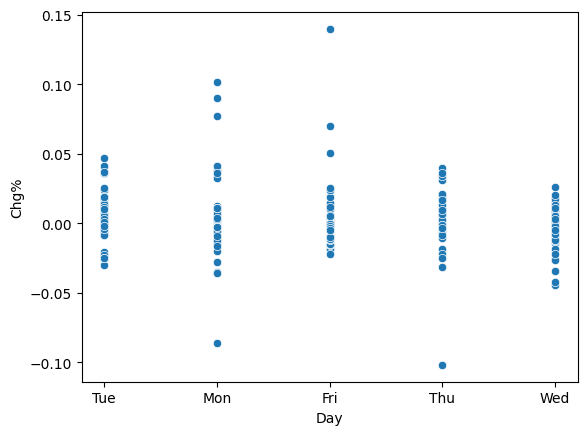

In [233]:
sns.scatterplot(x=df2.Day,y=df2.iloc[:,-1])

A5. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the 
following tasks:

• Study each attribute and associated values present. Identify the datatype (nominal etc.) 
for the attribute.

• For categorical attributes, identify the encoding scheme to be employed. (Guidance: 
employ label encoding for ordinal variables while One-Hot encoding may be employed 
for nominal variables).

• Study the data range for numeric variables.

• Study the presence of missing values in each attribute.

• Study presence of outliers in data. 

• For numeric variables, calculate the mean and variance (or standard deviation).


In [89]:
df3 = pd.read_excel(xls,"thyroid0387_UCI")

In [90]:
rid= df3.pop("Record ID")

In [91]:
#l1=(df3== "?").sum()
#numerical=[]
#for cnt,i in enumerate(l1):
#    if i:
#        numerical.append(l1.index[cnt])
#l2 = (df3=="f").sum()
#ordinal=[]
#for cnt,i in enumerate(l2):
#    if i:
#        ordinal.append(l2.index[cnt])

In [92]:
df3.shape

(9172, 30)

Study each attribute and associated values present. Identify the datatype (nominal etc.) 
for the attribute.

In [93]:
ordinal=[]
nominal=[]
numerical=["age"]
for i in df3.iloc[:,1:]:
    if "?" in  df3.loc[:,i].unique():
        numerical+=[i]
        continue
    if "t" in  df3.loc[:,i].unique():
        ordinal+=[i]
    else:
        nominal+=[i]

In [94]:
df3.iloc[:,2].unique()

array(['f', 't'], dtype=object)

In [95]:
def ordinal_encoder(x):
    return 1 if x=="t" else 0

In [96]:
dfc = df3.copy()

In [97]:
for i in ordinal:
    dfc[i]=dfc[i].map(ordinal_encoder)

In [98]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
ohe= OneHotEncoder(handle_unknown='ignore', sparse=False)

In [100]:
ohe_cols= pd.DataFrame(ohe.fit_transform(df3[nominal]));ohe_cols

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9168,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9169,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9170,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
num_cols =  dfc.drop(nominal, axis=1)

In [102]:
dfc = pd.concat([num_cols,ohe_cols], axis=1)

In [103]:
dfc

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,28,29,30,31,32,33,34,35,36,37
0,29,F,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,F,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,41,F,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,36,F,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,F,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9168,22,M,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9169,69,M,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9170,47,F,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [105]:
df5 = dfc.copy()

We use boxplots to observe outliers

In [93]:
for i in numerical:
    dfc.loc[:,i] = dfc.loc[:,i].replace("?",None)
    dfc.loc[:,i]=dfc.loc[:,i].dropna()

In [94]:
import seaborn as sns

<Axes: ylabel='TSH'>

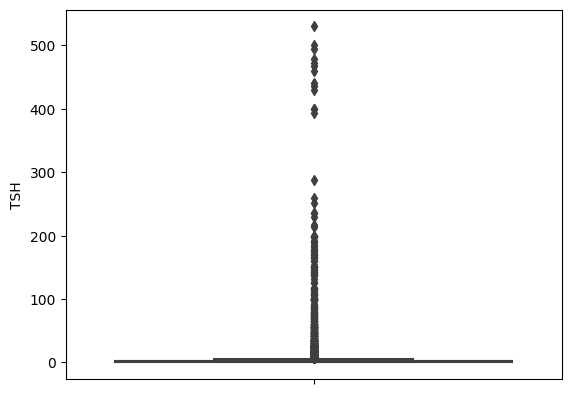

In [95]:
sns.boxplot(data=dfc,y="TSH")

<Axes: ylabel='T3'>

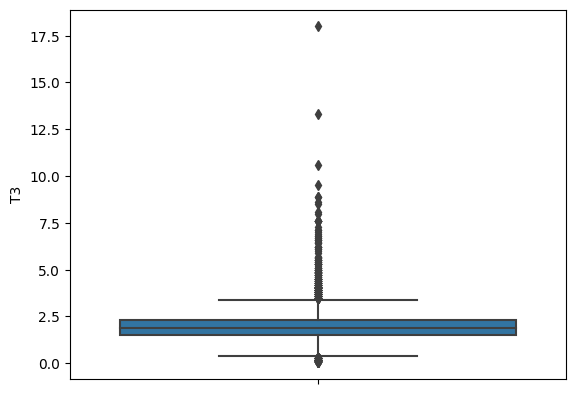

In [179]:
sns.boxplot(data=dfc,y="T3")

<Axes: ylabel='TT4'>

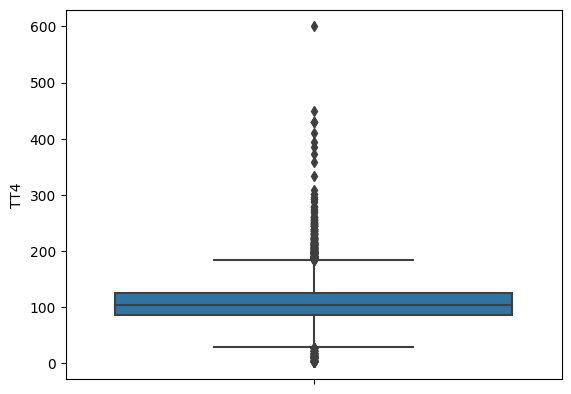

In [69]:
sns.boxplot(data=dfc,y="TT4")

<Axes: ylabel='T4U'>

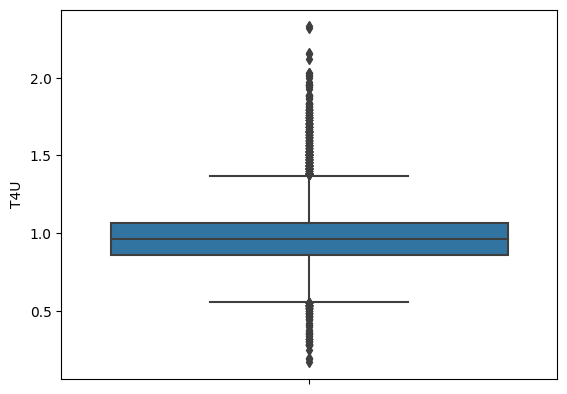

In [70]:
sns.boxplot(data=dfc,y="T4U")

<Axes: ylabel='FTI'>

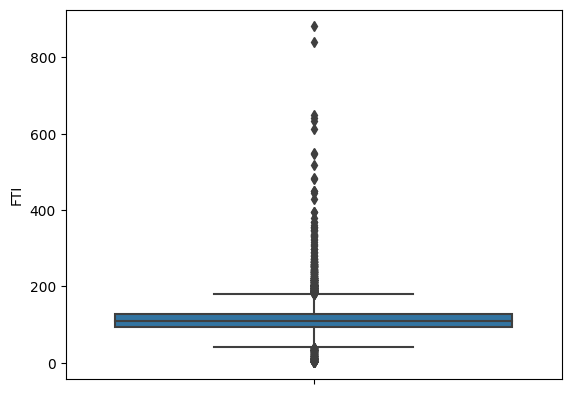

In [71]:
sns.boxplot(data=dfc,y="FTI")

<Axes: ylabel='TBG'>

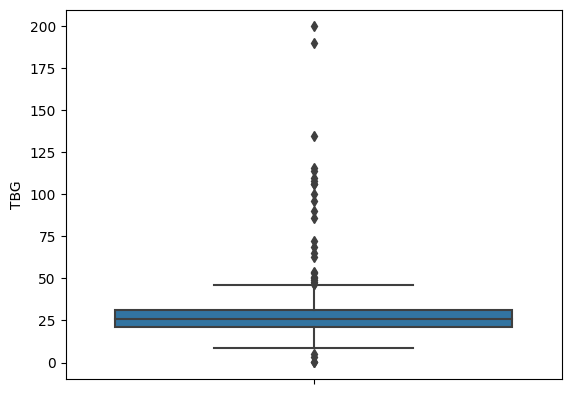

In [72]:
sns.boxplot(data=dfc,y="TBG")

<Axes: ylabel='age'>

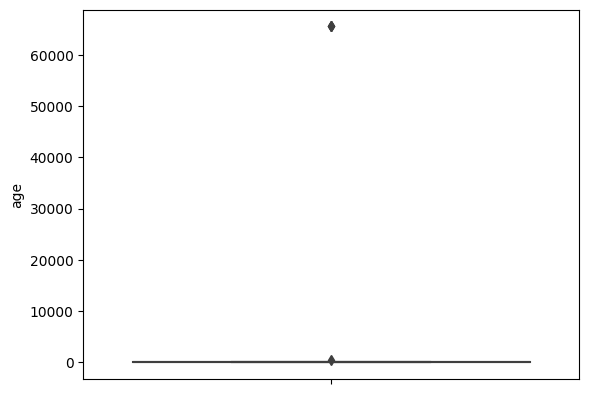

In [44]:
sns.boxplot(data=dfc,y="age")

In [96]:
dfc = df3.copy()
for i in numerical:
    dfc.loc[:,i] = dfc.loc[:,i].replace("?",None)

Mean and variance for numeric variables

In [98]:
numerical = [numerical[0]] + numerical[2:]

In [99]:
dfc[numerical].mean()

age     73.555822
TSH      5.218403
T3       1.970629
TT4    108.700305
T4U      0.976056
FTI    113.640746
TBG     29.870057
dtype: object

In [100]:
dfc[numerical].std()

age    1183.976718
TSH      24.184006
T3        0.887579
TT4       37.52267
T4U        0.20036
FTI       41.55165
TBG      21.080504
dtype: object

A6. Data Imputation: employ appropriate central tendencies to fill the missing values in the data 
variables. Employ following guidance.

• Mean may be used when the attribute is numeric with no outliers

• Median may be employed for attributes which are numeric and contain outliers

• Mode may be employed for categorical attributes

Removing age outlier

In [101]:
dfc=dfc.drop(dfc.loc[dfc.age>100].index)

<Axes: ylabel='age'>

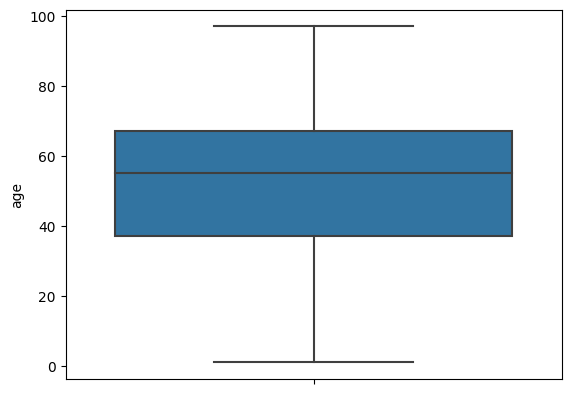

In [61]:
sns.boxplot(data=dfc,y="age")

In [102]:
df4 = dfc.copy()
for i in numerical[1:]:
    df4.loc[:,i] = df4.loc[:,i].replace("?",None)

Using median to fill in the missing values

In [103]:
for i in numerical[1:]:
    df4.loc[:,i]=df4.loc[:,i].fillna(df4.loc[:,i].median())

/tmp/ipykernel_33/2848536748.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4.loc[:,i]=df4.loc[:,i].fillna(df4.loc[:,i].median())
/tmp/ipykernel_33/2848536748.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df4.loc[:,i]=df4.loc[:,i].fillna(df4.loc[:,i].median())
/tmp/ipykernel_33/2848536748.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [104]:
nominal

['referral source', 'Condition']

In [105]:
for i in nominal:
    df4.loc[:,i] = df4.loc[:,i].replace(df4.loc[:,i].unique()[0],None)
    df4.loc[:,i]=df4.loc[:,i].fillna(df4.loc[:,i].mode()[0])

A7. Data Normalization / Scaling: from the data study, identify the attributes which may need 
normalization. Employ appropriate normalization techniques to create normalized set of data.


In [106]:
df4[numerical].agg("std")

age    18.910296
TSH    23.078332
T3      0.751859
TT4    36.628115
T4U     0.191399
FTI     39.72245
TBG     4.173543
dtype: object

In [107]:
df4[numerical].agg("mean")

age     52.099695
TSH      4.869665
T3       1.950479
TT4    108.469313
T4U      0.974621
FTI    113.233098
TBG     26.147322
dtype: object

In [162]:
from mlxtend.preprocessing import minmax_scaling


In [170]:
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


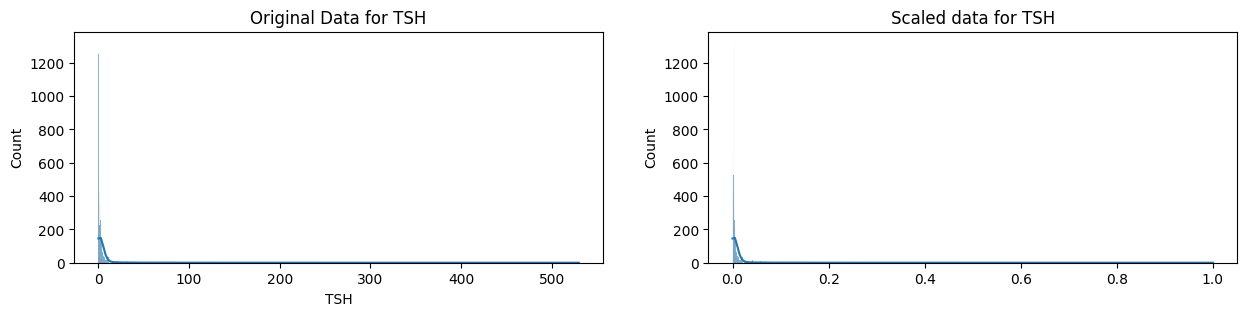

In [176]:
original_data = df4[normalize_cols[0]]
scaled_data = minmax_scaling(df4[normalize_cols[0]].to_numpy(),columns=0)
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title(f"Original Data for {normalize_cols[0]}")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title(f"Scaled data for {normalize_cols[0]}")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


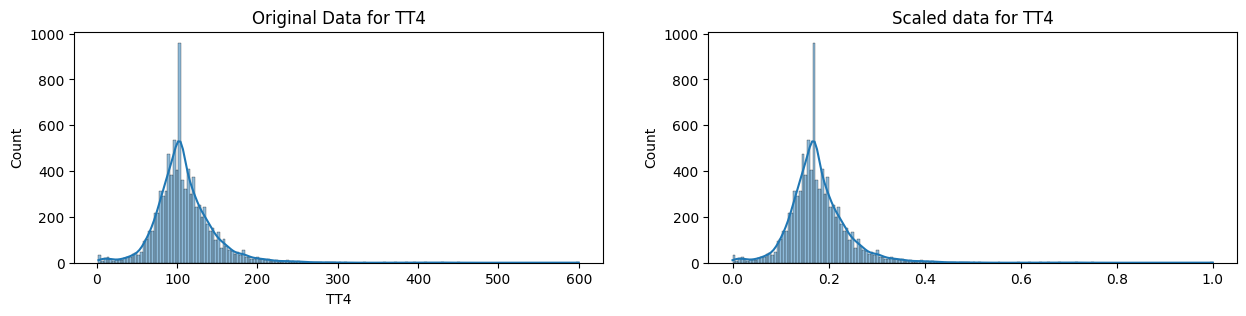

In [178]:
original_data = df4[normalize_cols[1]]
scaled_data = minmax_scaling(df4[normalize_cols[1]].to_numpy(),columns=0)
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title(f"Original Data for {normalize_cols[1]}")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title(f"Scaled data for {normalize_cols[1]}")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


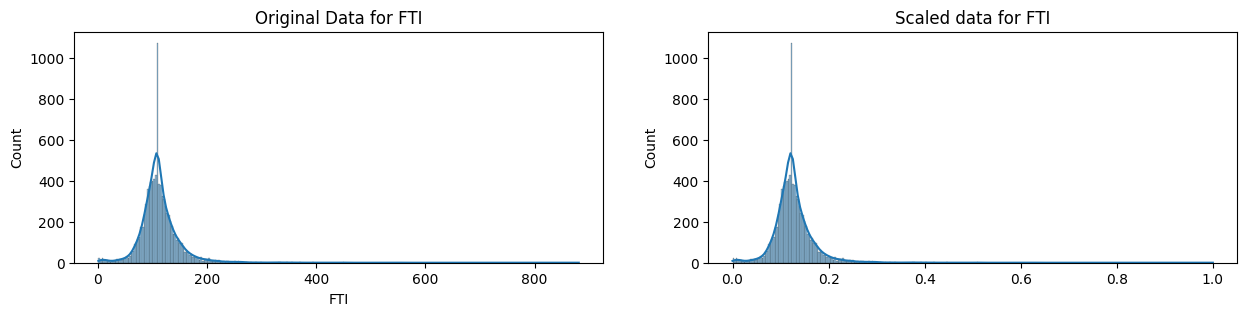

In [177]:
original_data = df4[normalize_cols[2]]
scaled_data = minmax_scaling(df4[normalize_cols[2]].to_numpy(),columns=0)
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title(f"Original Data for {normalize_cols[2]}")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title(f"Scaled data for {normalize_cols[2]}")
plt.show()

A8. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the 
attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate 
the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. 
Use first vector for each document for this. Compare the values for JC and SMC and judge the 
appropriateness of each of them.

JC = (f11) / (f01+ f10+ f11)

SMC = (f11 + f00) / (f00 + f01 + f10 + f11)

f11= number of attributes where the attribute carries value of 1 in both 
the vectors.

In [67]:
for i in ordinal:
    df5[i]=df5[i].map(ordinal_encoder)

In [146]:
t1 = df5.loc[:,ordinal]

In [147]:
t1.iloc[1,:].unique()

array([0, 1])

In [148]:
df5.iloc[:,2].unique()

array([0, 1])

In [169]:
def jc(r1,r2):
    f11 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==1)])
    f01 = sum([1 for i,j in zip(r1,r2) if (int(i)==0 and int(j)==1)])
    f10 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==0)])
    f11 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==1)])
    return f11/(f01+f10+f11)

In [172]:
def smc(r1,r2):
    f11 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==1)])
    f01 = sum([1 for i,j in zip(r1,r2) if (int(i)==0 and int(j)==1)])
    f10 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==0)])
    f11 = sum([1 for i,j in zip(r1,r2) if (int(i)==1 and int(j)==1)])
    f00 = sum([1 for i,j in zip(r1,r2) if (int(i)==0 and int(j)==0)])
    return (f11+f00)/(f00+f01+f10+f11)

In [173]:
jc(t1.iloc[0,:],t1.iloc[1,:])

0.25

In [174]:
smc(t1.iloc[0,:],t1.iloc[1,:])

0.85

A9. Cosine Similarity Measure: Now take the complete vectors for these two observations (including 
all the attributes). Calculate the Cosine similarity between the documents by using the second 
feature vector for each document.


In [165]:
r1,r2 =  t1.iloc[0,:],t1.iloc[1,:]

In [171]:
cosine_similarity(r1,r2)

0.40824829046386296

In [170]:
def cosine_similarity(r1,r2):
    r1,r2 = r1.to_numpy(),r2.to_numpy()
    return r1.dot(r2)/(np.linalg.norm(r1)*np.linalg.norm(r2))

A10. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS 
between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient 
calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.

In [176]:
np.matrix()

matrix([[10]])

In [206]:
data = t1.iloc[0,:]
blocks_jc = []
blocks_smc = []
blocks_cos = []
for i in range(20):
    tmp_jc=[]
    tmp_smc=[]
    tmp_cos=[]
    for j in range(20):
        tmp_jc.append(jc(t1.iloc[i,:],t1.iloc[j,:]))
        tmp_smc.append(smc(t1.iloc[i,:],t1.iloc[j,:]))
        tmp_cos.append(cosine_similarity(t1.iloc[i,:],t1.iloc[j,:]))
    blocks_jc.append(tmp_jc)
    blocks_smc.append(tmp_smc)
    blocks_cos.append(tmp_cos)

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Jaccard Coefficient'}>

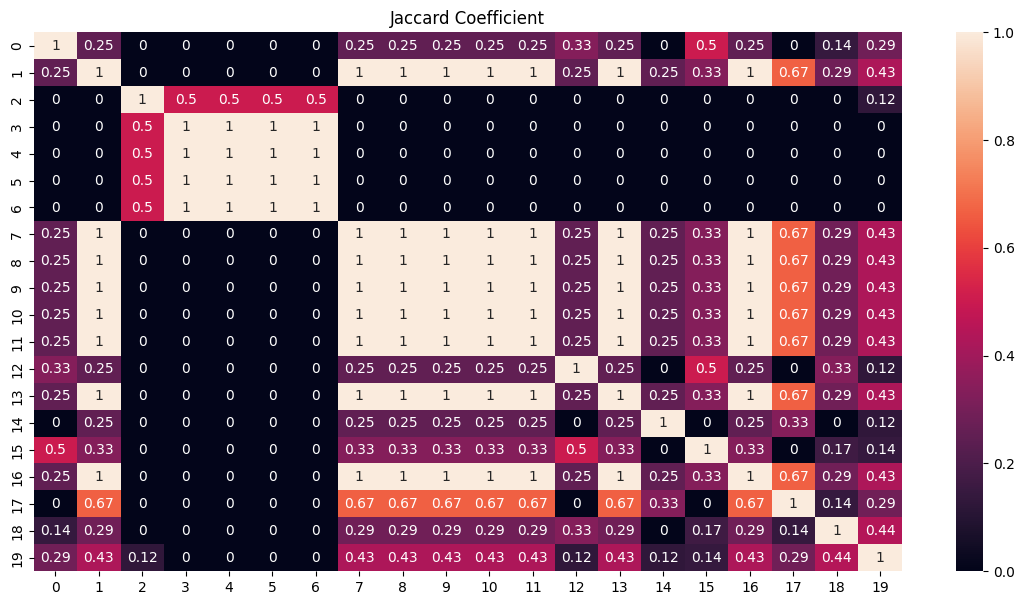

In [207]:
plt.figure(figsize=(14,7))

# Add title
plt.title("Jaccard Coefficient")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=np.matrix(blocks_jc), annot=True)


<Axes: title={'center': 'Simple Matching Coefficient'}>

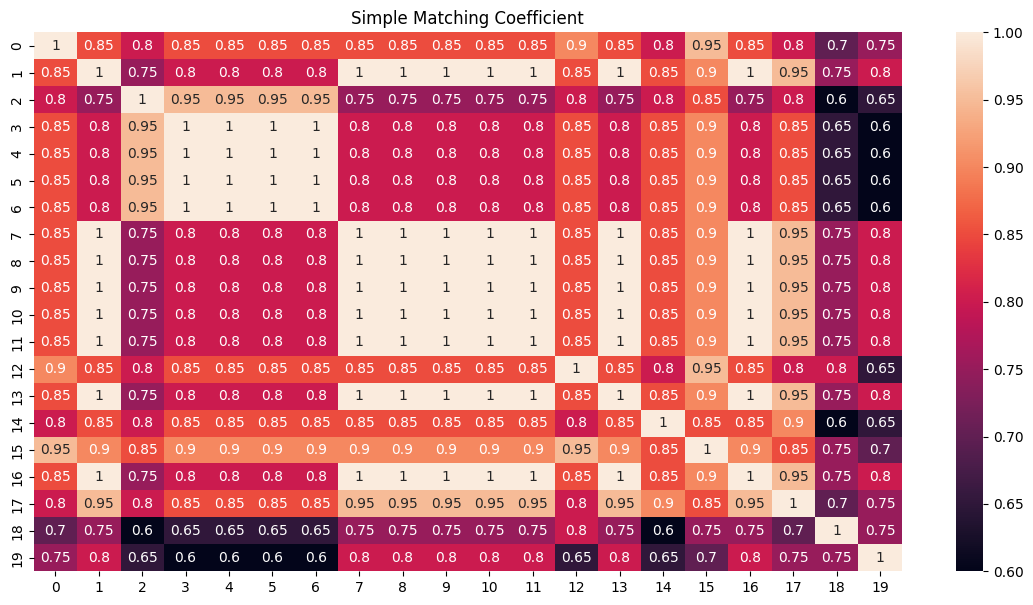

In [208]:
plt.figure(figsize=(14,7))

# Add title
plt.title("Simple Matching Coefficient")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=np.matrix(blocks_smc), annot=True)


<Axes: title={'center': 'Cosine Similarity'}>

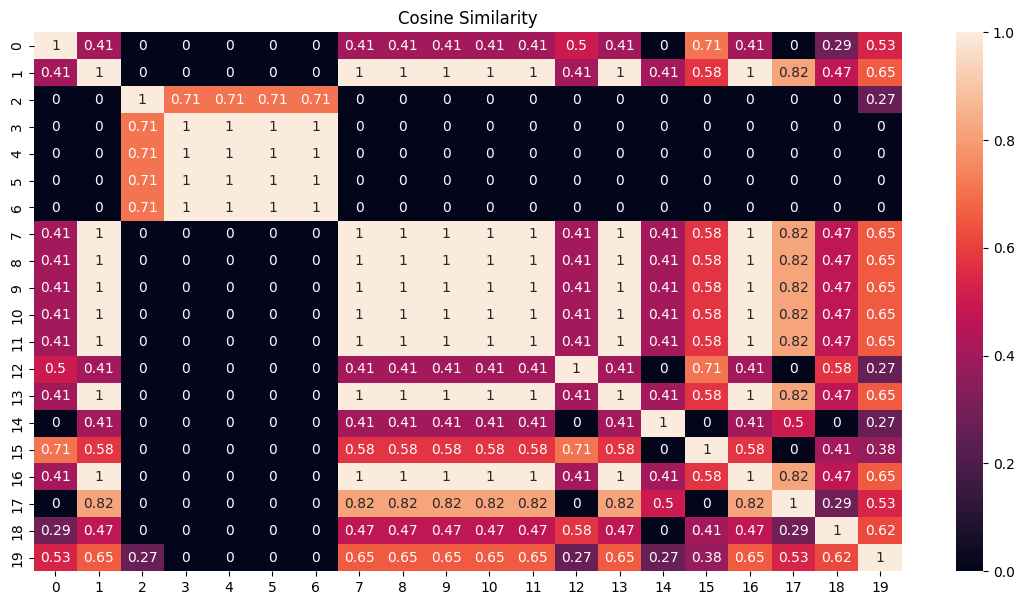

In [210]:
plt.figure(figsize=(14,7))

# Add title
plt.title("Cosine Similarity")

# Heatmap showing average arrival delay for each airline by month
sns.heatmap(data=np.matrix(blocks_cos), annot=True)
